EN2550 - Fundementals of Image Processing and Machine Vision [Assignment 2 Fitting and Alignment]

Name : R.G.S.M. RANATUNGA

Index No. : 190504H

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

Question 1

In [70]:
from scipy import optimize
from scipy.optimize import minimize
from scipy import linalg
import random

np.random.seed(0)
N = 100

half_n = N//2
r = 10
s = r /16

t = np.random.uniform(0, 2*np.pi, half_n) 
n = s*np.random.randn(half_n)
x , y = (r + n)*np.cos(t) , (r + n)*np.sin(t)
X_circ = np.hstack((x.reshape(half_n, 1) ,y.reshape (half_n, 1)))

m, b = -1, 2
x = np.linspace (-12, 12, half_n)
y = m*x + b + s*np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1) ,y.reshape(half_n, 1)))

X = np.vstack ((X_circ, X_line))


In [71]:
def random_sampling(data):
	sample, ran_list, count = [], [], 0

	# Get three random points from data
	while True:
		ran = np.random.randint(len(data))

		if ran not in ran_list:
			sample.append(data[ran])
			ran_list.append(ran)
			count += 1

			if count == 3:
				break

	return np.array(sample)

def make_model(sample):
	
    # Create a model circle to fit the 3 points and return its center and radius
	pt1 = sample[0]
	pt2 = sample[1]
	pt3 = sample[2]

	A = np.array([[pt2[0] - pt1[0], pt2[1] - pt1[1]], [pt3[0] - pt2[0], pt3[1] - pt2[1]]]) 
	B = np.array([[pt2[0]**2 - pt1[0]**2 + pt2[1]**2 - pt1[1]**2], [pt3[0]**2 - pt2[0]**2 + pt3[1]**2 - pt2[1]**2]])		
	inv_A = linalg.inv(A)

	c_x, c_y = np.dot(inv_A, B) / 2
	c_x, c_y = c_x[0], c_y[0]
	r = np.sqrt((c_x - pt1[0])**2 + (c_y - pt1[1])**2)

	return c_x, c_y, r

def find_inliers(data_list, c_x, c_y, r):
    
    # Obtain the inliers of the model circle within a threshold
    inliers = []
    thresh = r//5

    for i in range(len(data_list)):
        e = np.sqrt((data_list[i][0]-c_x)**2 + (data_list[i][1]-c_y)**2) - r
        if e < thresh:
            inliers.append(data_list[i])

    return np.array(inliers)

def RANSAC(data, N):
    
    center = (0,0)
    radius = 0

    best_sample = []
    best_inliers = []
    max_inliers = 0
    
    for i in range(N):
        samples = random_sampling(data)
        c_x, c_y, radius = make_model(samples)
        inliers = find_inliers(X_circ, c_x, c_y, radius)
        tot_inliers = len(inliers)

        if tot_inliers > max_inliers:
            center = (c_x, c_y)
            radius = radius
            best_sample = samples
            best_inliers = inliers
            max_inliers = tot_inliers

    print("Center =", center)
    print("Radius =", radius)

    return center, radius, best_sample, best_inliers

Center = (0.8109750187342257, -0.6478693314934061)
Radius = 10.445026424137957


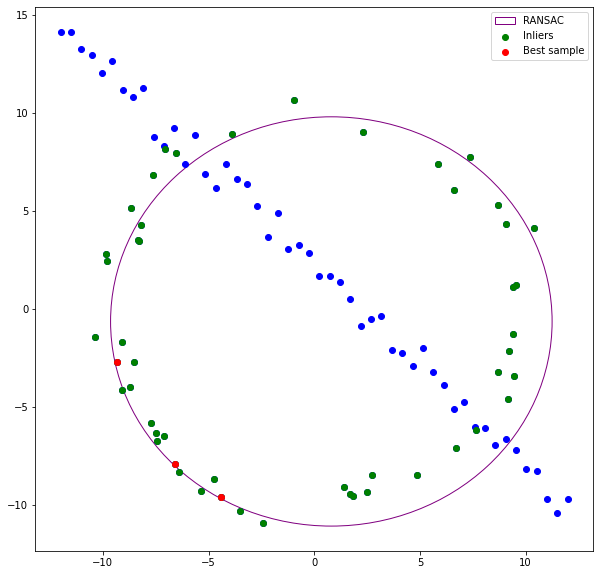

In [72]:
c, r, sample, inliers = RANSAC(X_circ, 10000)
fig,ax = plt.subplots(1,1, figsize = (10,10))
circle = plt.Circle(c, r, fill = False, color='purple', label = 'RANSAC')

ax.add_patch(circle)

plt.scatter(X[:,0],X[:,1], c='b', marker='o')
ax.scatter(inliers[:,0], inliers[:,1], color = 'g', label='Inliers' )
ax.scatter(sample[:,0], sample[:,1], c = 'r', label='Best sample' )

plt.legend()
plt.show()

Question 2

In [8]:
# Function to find the points in the image using left mouse click
def click(event, x, y, flags, params):
    if event == cv.EVENT_LBUTTONDOWN:
        print(x, " ", y)

In [9]:
im1 = cv.imread(r'./flag.png', cv.IMREAD_ANYCOLOR)
assert im1 is not None
cv.imshow("Image 1",im1)
cv.setMouseCallback("Image 1",click)
cv.waitKey(0)

bg = cv.imread(r'./images/001.jpg', cv.IMREAD_ANYCOLOR)
assert bg is not None
cv.imshow("Image 2",bg)
cv.setMouseCallback("Image 2",click)
cv.waitKey(0)
cv.destroyAllWindows()

(-0.5, 1023.5, 767.5, -0.5)

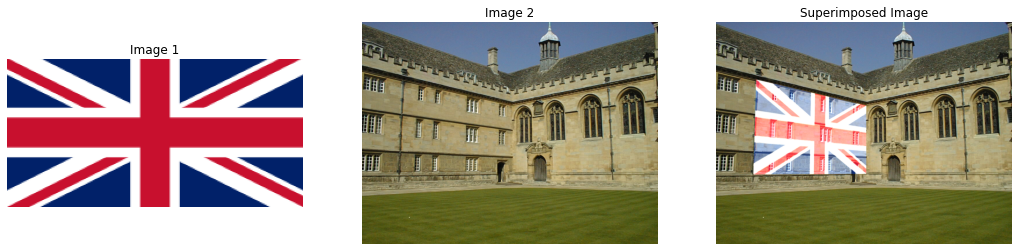

In [66]:
im1 = cv.imread(r'./flag.png', cv.IMREAD_ANYCOLOR)
bg = cv.imread(r'./images/001.jpg', cv.IMREAD_ANYCOLOR)

rows,cols,ch = bg.shape

pts1 = np.float32([[0,0],[255,0],[0,125],[255,125]]) # flag coords 
pts2 = np.float32([[140,200],[520, 290],[130,520],[520,520]]) # building coords

M = cv.getPerspectiveTransform(pts1,pts2)    
dst = cv.warpPerspective(im1,M,(cols,rows)) # Warping

overlay = cv.add(bg, dst) # Blending the two images

fig,ax = plt.subplots(1,3, figsize = (18, 18))
ax[0].imshow(cv.cvtColor(im1, cv.COLOR_BGR2RGB))
ax[0].set_title('Image 1')
ax[0].axis('off')
ax[1].imshow(cv.cvtColor(bg, cv.COLOR_BGR2RGB))
ax[1].set_title('Image 2')
ax[1].axis('off')
ax[2].imshow(cv.cvtColor(overlay, cv.COLOR_BGR2RGB))
ax[2].set_title('Superimposed Image')
ax[2].axis('off')

In [11]:
im2 = cv.imread(r'./image3.jpg', cv.IMREAD_ANYCOLOR)
assert im2 is not None
cv.imshow("Image 1",im2)
cv.setMouseCallback("Image 1",click)
cv.waitKey(0)

bg = cv.imread(r'./image5.jpg', cv.IMREAD_ANYCOLOR)
assert bg is not None
cv.imshow("Image 2",bg)
cv.setMouseCallback("Image 2",click)
cv.waitKey(0)
cv.destroyAllWindows()

(-0.5, 899.5, 505.5, -0.5)

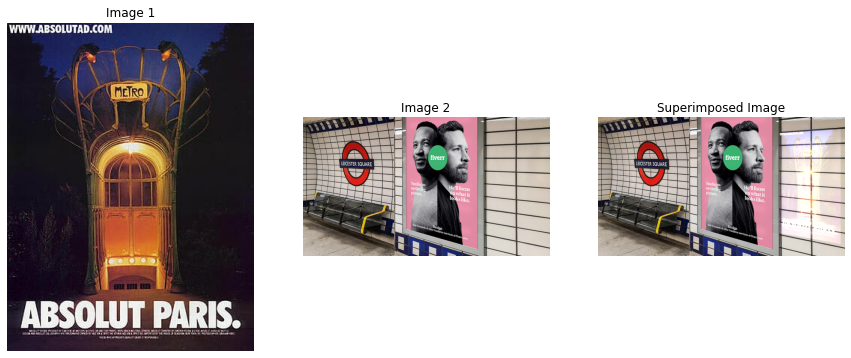

In [65]:
im2 = cv.imread(r'./image3.jpg', cv.IMREAD_ANYCOLOR)
bg = cv.imread(r'./image5.jpg', cv.IMREAD_ANYCOLOR)

rows,cols,ch = bg.shape

pts1 = np.float32([[0,0],[350,0],[0,450],[350,450]]) # flag coords 
pts2 = np.float32([[660,55],[900,40],[660,430],[900,475]]) # building coords

M = cv.getPerspectiveTransform(pts1,pts2)    
dst = cv.warpPerspective(im2,M,(cols,rows))

overlay = cv.add(bg, dst)

fig,ax = plt.subplots(1,3, figsize = (15, 15))
ax[0].imshow(cv.cvtColor(im2, cv.COLOR_BGR2RGB))
ax[0].set_title('Image 1')
ax[0].axis('off')
ax[1].imshow(cv.cvtColor(bg, cv.COLOR_BGR2RGB))
ax[1].set_title('Image 2')
ax[1].axis('off')
ax[2].imshow(cv.cvtColor(overlay, cv.COLOR_BGR2RGB))
ax[2].set_title('Superimposed Image')
ax[2].axis('off')

In [13]:
im3 = cv.imread(r'./image2.jpg', cv.IMREAD_ANYCOLOR)
assert im3 is not None
cv.imshow("Image 1",im3)
cv.setMouseCallback("Image 1",click)
cv.waitKey(0)

bg = cv.imread(r'./image1.jfif', cv.IMREAD_ANYCOLOR)
assert bg is not None
cv.imshow("Image 2",bg)
cv.setMouseCallback("Image 2",click)
cv.waitKey(0)
cv.destroyAllWindows()

(-0.5, 324.5, 154.5, -0.5)

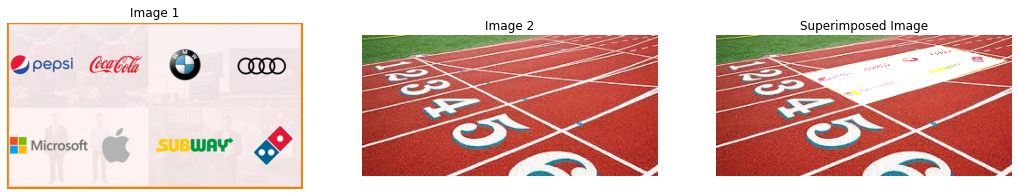

In [64]:
im3 = cv.imread(r'./image2.jpg', cv.IMREAD_ANYCOLOR)
bg = cv.imread(r'./image1.jfif', cv.IMREAD_ANYCOLOR)

rows,cols,ch = bg.shape

pts1 = np.float32([[0,0],[1200,0],[0,670],[1200,670]]) 
pts2 = np.float32([[95,43],[245, 11],[162,76],[320,28]]) 

M = cv.getPerspectiveTransform(pts1,pts2)    
dst = cv.warpPerspective(im3,M,(cols,rows))

overlay = cv.add(bg, dst)

fig,ax = plt.subplots(1,3, figsize = (18, 18))
ax[0].imshow(cv.cvtColor(im3, cv.COLOR_BGR2RGB))
ax[0].set_title('Image 1')
ax[0].axis('off')
ax[1].imshow(cv.cvtColor(bg, cv.COLOR_BGR2RGB))
ax[1].set_title('Image 2')
ax[1].axis('off')
ax[2].imshow(cv.cvtColor(overlay, cv.COLOR_BGR2RGB))
ax[2].set_title('Superimposed Image')
ax[2].axis('off')

Question 3

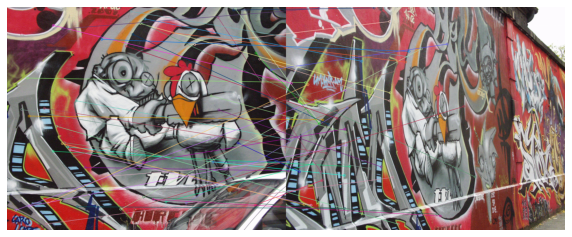

In [15]:
#reading image
img1 = cv.imread('graf/img1.ppm')  
img5 = cv.imread('graf/img5.ppm')

img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img5 = cv.cvtColor(img5, cv.COLOR_BGR2RGB)

#keypoints
sift = cv.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img5,None)

bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

fig, ax = plt.subplots(figsize = (10,10))
ax.axis('off')
img3 = cv.drawMatches(img1, keypoints_1, img5, keypoints_2, matches[:50], img5, flags = 2)
plt.imshow(img3)
plt.show()